<a href="https://colab.research.google.com/github/kayodeolusanya/Selore-Customer-Segmentation-ML-Project/blob/main/Selore_Nig_Customer_Segmentation_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv('/content/Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

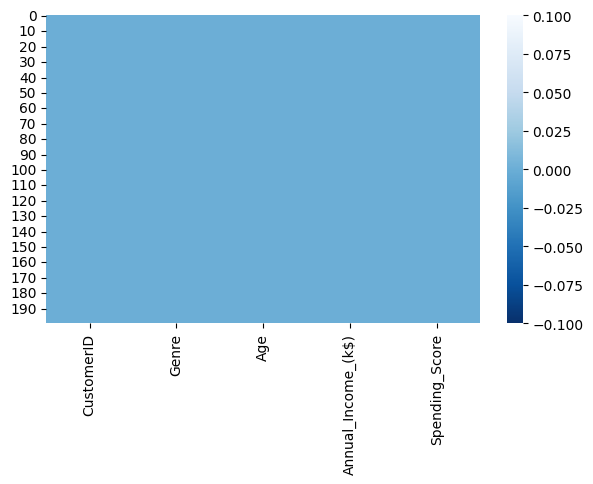

In [12]:
# Checking for missing values
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(7,4))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

### Data Cleaning and Preprocessing

In [13]:
# Check for duplicates
print(df.duplicated().sum())

0


### Exploratory Data Analysis

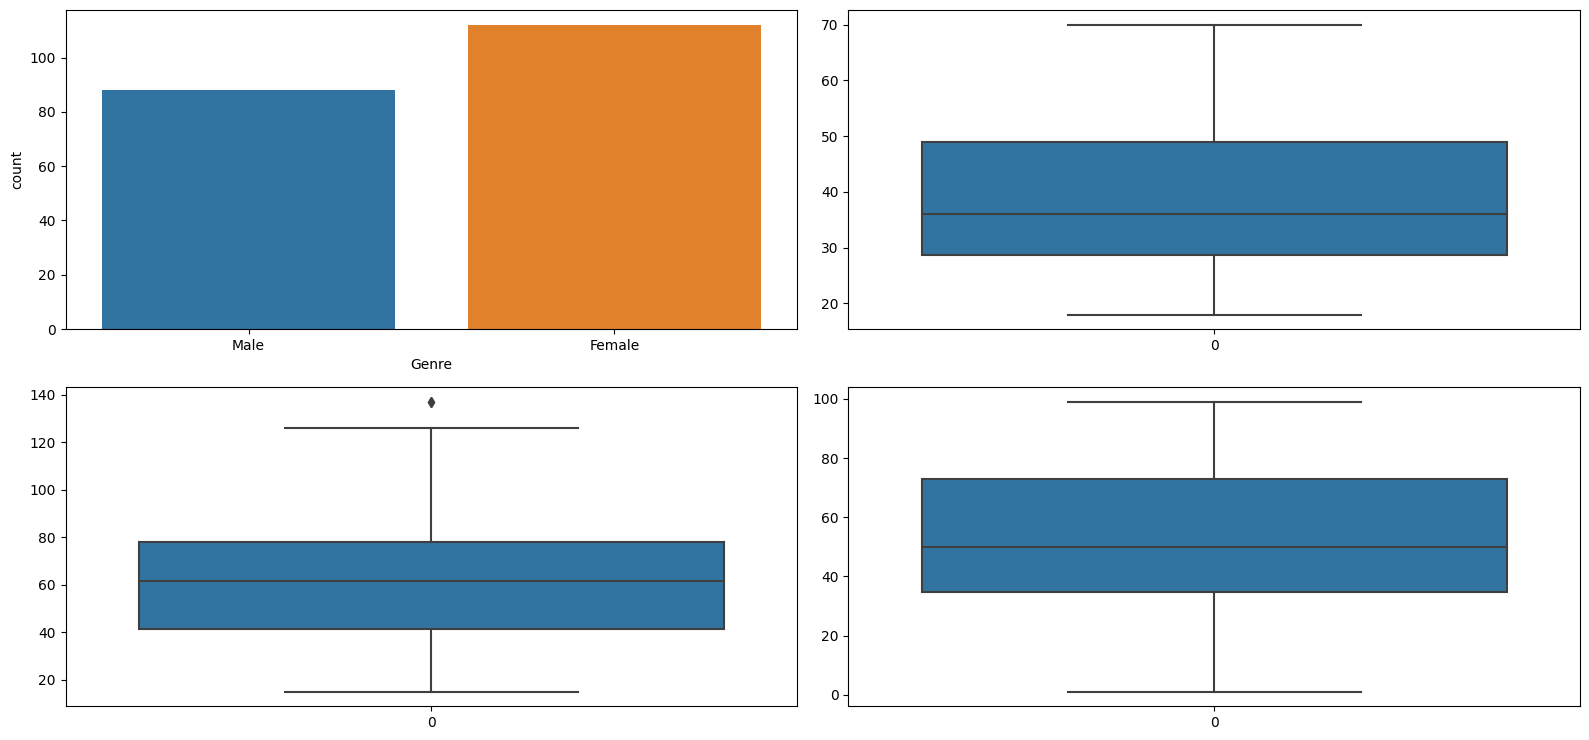

In [18]:
fig, axs = plt.subplots(2,2, figsize = (16,7.5))
plt1 = sns.countplot(x=df['Genre'], ax = axs[0,0])
plt2 = sns.boxplot(df['Age'], ax = axs[0,1])
plt3 = sns.boxplot(df['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(df['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

In [20]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() #method initialization

#Looping for columns except Survived
for c in df.columns[1:]:
  if(df[c].dtype=='object'):
    df[c] = encoder.fit_transform(df[c])
  else:
    df[c] = df[c]

df.head()


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [22]:
# Remove Customer ID
df.drop('CustomerID', axis=1, inplace= True)
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


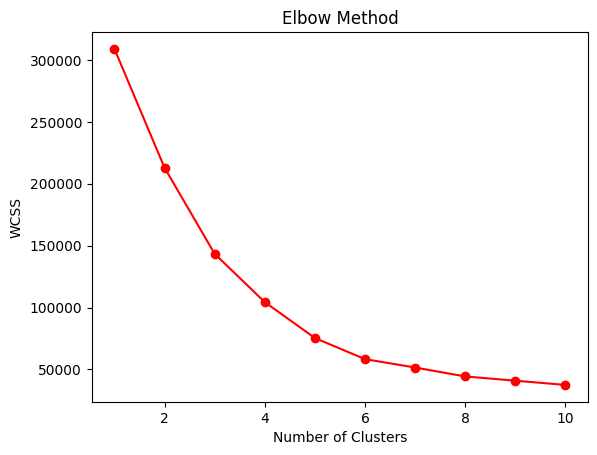

In [23]:
# Deter
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the plotted graph, 5 clusters is the optimal number of clusters.

In [24]:
# Fit K-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df)

# Add cluster labels to data 
df['Cluster'] = kmeans.labels_

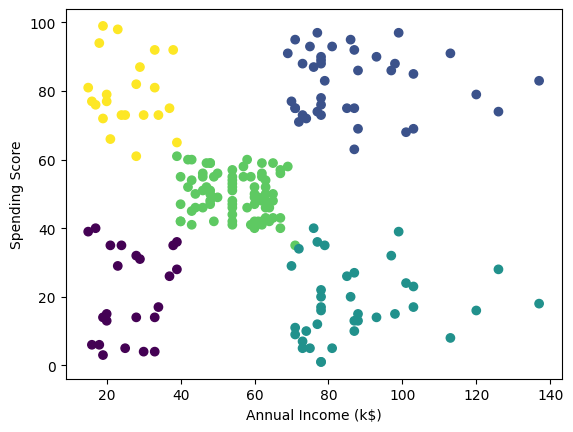

0.44493777835059417

In [25]:
# V isualizing the results
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], c=df['Cluster'], label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df, kmeans.labels_)